In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from markovchain import MarkovChain as MC
import scipy.linalg as la
from numpy import linalg as lnal

# Markov Chains

## What are they and how can they help us understand Student Data?

### History

To understand Markov chains it would help to understand where they originated. Andrey Markov was a Russian mathematician who is best known for his work in Probability Theory. In the late 1800's to early 1900's Andrey Markov studied and taught at the Saint Petersburg State University. He and his fellow mathematicians were working on some very foundational ideas in probability theory. One of those being the Law of Large Numbers which says with a sample of independent and indentically disributed random variables the sample mean will tend toward the population mean as the sample size grows larger. Another such problem was a proof for a Generalzed Central Limit Theorem (CLT). In short the CLT says that when we take the mean of samples of independent random variables, the distribuation of the sample means will tend toward a normal distribution. (1)

Markov had a disagreement with another mathematician on whether the implementation of the law of large numbers required ******* independence ******* between variables. To show how a process involving dependent variables could have the average of its outcomes converge over time, Markov developed a stochastic process known as a Markov chain. (4)

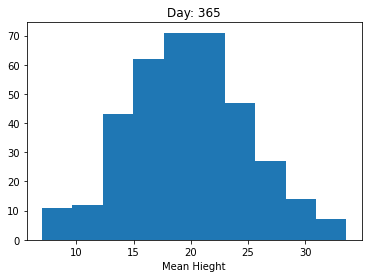

In [59]:
# list of sample means
means = [] 

# Generating 365 random numbers from 0 to 40
# taking their mean and appending it to list means.
np.random.seed(1)
x = [np.mean(np.random.randint(0, 40, 5)) for _i in range(365)]
means.append(x)

plt.hist(means, 10)
plt.title(label = 'Day: 365')
plt.xlabel('Mean Hieght')
plt.show()

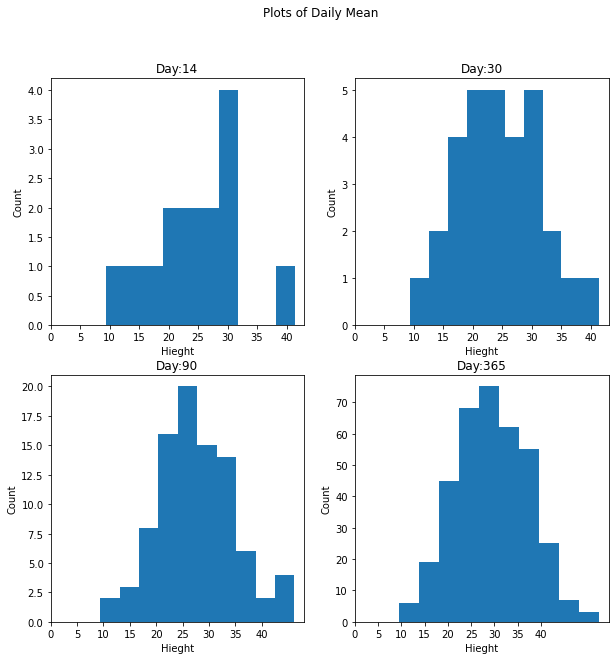

In [106]:
# number of sample
num = [14,30,90,365] 
# list of sample means
means = [] 
 
# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(numpy.random.randint(0, 60, 5)) for _i in range(j)]
    means.append(x)

k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(10, 10))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10)
        ax[i, j].set_title(label = 'Day:' + str(num[k]))
        ax[i, j].set_xticks(ticks=[0,5,10,15,20,25,30,35,40])
        ax[i, j].set_xlabel('Hieght')
        ax[i, j].set_ylabel('Count')
        
        k = k + 1
fig.suptitle('Plots of Daily Mean')
plt.show()

Text(0, 0.5, 'Total Mean')

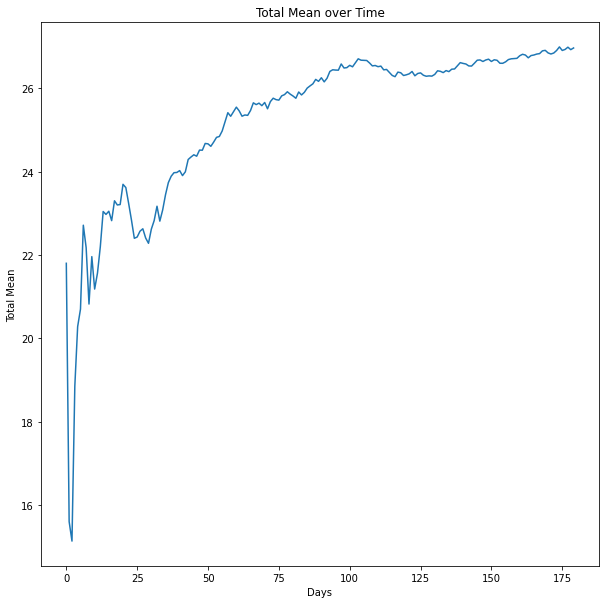

In [110]:

# number of sample
num = [180] 

# list of sample means
means = [] 
 
# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(numpy.random.randint(0, 55, 5)) for _i in range(j)]
    means.append(x)

len(means[0])
sum_mean = []
y = 0
for index, x in enumerate(means[0]):
    y += x
    sum_mean.append(y/(index + 1))

plt.figure(figsize=(10,10))
plt.plot(sum_mean)
plt.title('Total Mean over Time')
plt.xlabel('Days')
plt.ylabel('Total Mean')

### Stochastic Process

Stochastic or random Process is a collection of random variables indexed against a variable or set of variables, usually interpreted as time. 

If this index can be counted in whole numbers it is considered to be a discrete-time process. 

If the index is the real number line it is concidered a continous-time process. 

Markov chains can exist in both discrete and continuous form.

######## Smooth Transition ######## 

******** EXPLAIN BETTER ****** When we have a random variable X(t) at time t, we can say that X(t) is in a state at time t. 

We have what is called a 'state space' of a stochastic process when we have a ****set** of all possible values X(t) can be. 

So a Stochastic process is a collection of random variables that descirbes the evolution of some process over time.(2)

### Markov chains Introduciton

Markov chains are what is called memoryless meaning that the value of the next state is only dependent on the value of the current state.


************** BETTER TRANSITION ******************

### Visualizing Markov Chains

Transition Diagram shows the different states of a markov chain and then shows the probabilites of going between each state. 

tree diagrams are very similar to the above visual but it is in a more traditional tree format.

Use HeatMap to show transitions

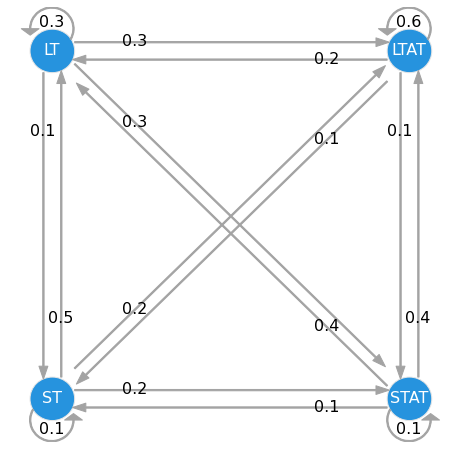

In [27]:
# Simple Transition Diagram(6)

P = np.array([
[0.3,    0.3,    0.3,   0.1],
[0.2,    0.6,    0.1,   0.1],  
[0.4,    0.4,    0.1,   0.1],
[0.5,    0.2,    0.2,   0.1]    
])
mc = MC(P, ['LT', 'LTAT', 'STAT','ST'])
mc.draw()

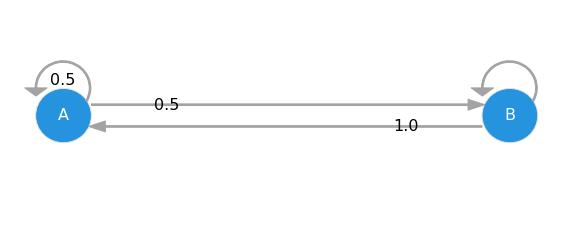

In [28]:
periodic = np.array([[0.5,0.5],
                     [1,0]])
mc = MC(periodic, ['A','B'])
mc.draw()

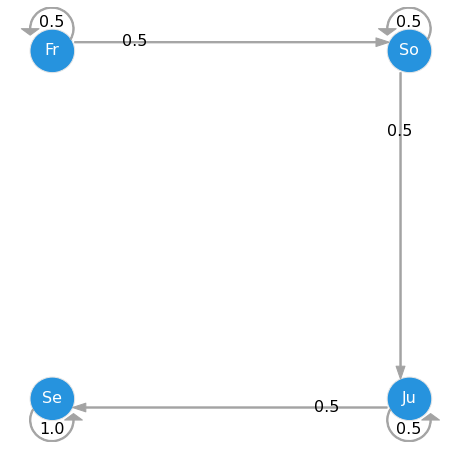

In [32]:
stdismul = np.array([[0.5,0.5,0,0],[0,0.5,0.5,0],[0,0,0.5,0.5],[0,0,0,1]])
mc = MC(stdismul, ['Fr','So','Ju','Se'])
mc.draw()

In [10]:
trees = ['Large Trees', 'Larger Than Average Trees','Shorter Than Average Trees','Short Trees']

P = pd.DataFrame([
[0.3,    0.3,    0.3,   0.1],
[0.2,    0.6,    0.2,   0.1],  
[0.4,    0.4,    0.1,   0.1],
[0.5,    0.2,    0.2,   0.1]    
], columns = trees, index = trees)
    
P

,Large Trees,Larger Than Average Trees,Shorter Than Average Trees,Short Trees
Large Trees,0.3,0.3,0.3,0.1
Larger Than Average Trees,0.2,0.6,0.2,0.1
Shorter Than Average Trees,0.4,0.4,0.1,0.1
Short Trees,0.5,0.2,0.2,0.1


In [34]:
year = ['Freshman','Sophmore','Junior','Senior']

P = pd.DataFrame([[0.5,0.5,0,0],[0,0.5,0.5,0],[0,0,0.5,0.5],[0,0,0,1]], columns = year, index = year)
    
P

,Freshman,Sophmore,Junior,Senior
Freshman,0.5,0.5,0.0,0.0
Sophmore,0.0,0.5,0.5,0.0
Junior,0.0,0.0,0.5,0.5
Senior,0.0,0.0,0.0,1.0


In [17]:
IS = pd.DataFrame([0.1, 0.2, 0.4, 0.3], columns = ['Probability of event'], index = trees)
IS.T

,Large Trees,Larger Than Average Trees,Shorter Than Average Trees,Short Trees
Probability of event,0.1,0.2,0.4,0.3


In [20]:
TM = np.array([
[0.3,    0.3,    0.3,   0.1],
[0.2,    0.6,    0.2,   0.1],  
[0.4,    0.4,    0.1,   0.1],
[0.5,    0.2,    0.2,   0.1]    
])

IM = np.array([0.1, 0.2, 0.4, 0.3])
              
NM = TM @ IM
NM

array([0.24, 0.25, 0.19, 0.2 ])

In [46]:
#tm = np.array([1,0,0,0],[0,0.5,0.5,0],[0.5,0,0.5,0],[0,0.5,0,0.5])
Q = [[0.5,0.5,0],[0,0.5,0],[0.5,0,0.5]]
I = np.identity(3)
F = la.inv(I - Q)
F_df = pd.DataFrame(F, columns = ['Sophomore','Junior','Freshman'],index = ['Sophomore','Junior','Freshman'])
F_df.loc['Sophomore','Freshman'] = 0
F_df.loc['Junior','Freshman'] = 0
F_df

,Sophomore,Junior,Freshman
Sophomore,2.0,2.0,0.0
Junior,0.0,2.0,0.0
Freshman,2.0,2.0,2.0


In [50]:
pd.DataFrame(F_df.sum(),columns=['Mean time to Absorption'])

,Mean time to Absorption
Sophomore,4.0
Junior,6.0
Freshman,2.0


In [52]:
# Absorbing Probabilities found using a high power of the transition matrix to find the limiting matrix
col = ['Senior','Sophomore','Junior','Freshman']
P_bar_power = pd.DataFrame(lnal.matrix_power([[1,0,0,0],[0,0.5,0.5,0],[0.5,0,0.5,0],[0,0.5,0,0.5]], 100).round(4), columns = col , index = col)
P_bar_power

,Senior,Sophomore,Junior,Freshman
Senior,1.0,0.0,0.0,0.0
Sophomore,1.0,0.0,0.0,0.0
Junior,1.0,0.0,0.0,0.0
Freshman,1.0,0.0,0.0,0.0


### Transition Matrix

Transition Probability Matrix explain the same system as a transition diagram or tree diagram but are used to be able to perform mathematical operations on the markov chain. 

A matrix of the probabilites between each state. 

p =     (End State)
        A   B   C
(S S  A [0   1   0]    
t t   B [0.7 0 0.3]  
a a   C [0   0   1]   
r t
t e)

Each row is made up of the proabilities of each starting state.
Each Column represents the next state.

If we start with state A there is a probability of 1 that we will go to state B
                                                   0 that we will go to state A or C. 

Once in state B there is a probability of 0.7 we will return to A, 
                                          0 we will stay at B,
                                          0.2 proability we will got to C. 

Once in state C we will stay at C with a probability of 1

### States

Absorbing State are states that onced reached it is impossible to leave that state so there is a probability of 1 that they will return to themselves.

Transient State is a state that will only return to itself a finite amount of times. 

Recurrant state is a state that returns to itself infinitely often.

p =      A   B   C
      A [0   1   0]    
      B [0.7 0 0.3]  
      C [0   0   1]   

A would be a transient state, it will return to itself a finite amount of times.
B would be a transient state, it will return to itself a finite amount of times.
C would be an absorbtion state which is a type of recurrant state that has a probability of 1 that its next state will be itself.

States in a class are states that only communicate with each other

### Moving past the initial State


In the example above our Initial state is state A at time t and our next states are t + 1, t + 2, t + 3, ...... t + n.

the initial state matrix is multiplied by the transition matrix to give us the first state matrix at t + 1 the process is repeated to give us t + 2 and so on.

*******************Possibly show heatmap of simulation of steps through states********************

### Regular Markov Chains

Regular Markov Chains exist when some power of the transition matrix has only positive non zero values.

If our markov chain is regular it has what is called a Stationary Matrix which is a condition where our state matrix after so many iteration converges on a stationary state.

S = State matrix

P = Transition matrix

S*P = S

This shows us where our markov chain will eventaully converge to.

We can find a Limiting Matrix when we take successive powers of the transition matrix and eventually converge to a state where each row of the transition matrix is equal to the stationary matrix.

### Absorbing Markov Chains

Abosrbing markov chains exist when the markov chains have an absorbing state and all other states have a way to reach the absorbing state.

An absorbing markov chain is said to be in a standard form when all absorbing states precede all the non absorbing states which will help us mathematically determine our limiting matrix. After putting the transition matrix into standard form we seperate it like so:
    
P = [[I , O]
    [R , Q]]

I = All the absorbtion states probabilites of reaching each other so 0 or 1
O = An all zero matrix
R = The probabilities that the transient states will reach an absorbing state
Q = The probabilities that the transient states will reach each other

For Absorbing Markov chains if we take the Transition matrix and keep raising it to a higher and higher order eventually we will reach limiting Matrix that will tell us the probability that we will end up in a abosorbtion state at each potential starting state. This limiting matrix will have the form:

P_bar = [[I, O]
         [FR, 0]]

The fundamental matrix F can be found with the equation below:

F = (I - Q)^-1

The *****  identity ****** matrix I must be the same size as the matrix Q.

### Properties of Markov Chains

Periodic if the chain can return to the state only at multiples of some integer larger than one.
Aperiodic if the chain has a recurrance of one.

Ergodecity state is a state that is aperiodic and and positive recurrent

### Other types of Markov Chains

Hidden Markov Chains

telescoping Markov Chain

homogeneous Markov Chain is homogeneous in time if the transition probability between two distenct states depends only on the time step difference.

irreducible Markov Chain

### Markov Chain Examples

Random walk

Gamblers ruin

### How are Markov Chains used?

Fields of Study and Application

PageRank, population dynamics, thermodynamics, chemistry, information theory, queueing theory, economics, finance, social sciences, music, weather forecasting, Text generators, baseball

Uses in Machine Learning

(1) https://www.britannica.com/biography/Andrey-Andreyevich-Markov

(2) "Introduction to Probability Models", 12th Edition, by Sheldon Ross.  (Published by Academic Press)

(3) https://math.libretexts.org/Bookshelves/Applied_Mathematics/Applied_Finite_Mathematics_(Sekhon_and_Bloom)/10%3A_Markov_Chains

(4) https://medium.com/towards-data-science/markov-models-and-markov-chains-explained-in-real-life-probabilistic-workout-routine-65e47b5c9a73

(5) https://www.mdpi.com/2227-7102/10/12/377/htm

(6) https://www.iiis.org/CDs2016/CD2016Spring/papers/ZA253RD.pdf

(7) https://github.com/NaysanSaran/markov-chain

# Explore

- Using the ratio of attempted to completed courses could you use a markov chain to predict the next ratio.

- Standard statistical hypothesis testing techniques can be applied to determine if the underlying transition matrix has evolved with time.

- Can you mimic the actual student data more accurately with a random choice that mimics the original distribution?

- Transition between Summer to fall, fall to spring, spring to summer probably have different probabilities

- Freshman, sophomore, junior, senior may have different probability if they have been in the state for 1 semester or 3 semesters

- If the Overall transition matrix is applied to the ratios of students states in each sememster how well do they predict the next state and future states?

- What is the difference if we create a transition matrix from each semester and use it to predict the next state?

- Can you track the change of the transition matrix through semesters?

- Whats the difference in the change if the transition matrix is made from each semester individually or if one is update each progressive semester?

- Should the students be modeled by cohort or should all students be included every semester no matter how far along they are?



In [53]:
33**3 + 32**2 + 31

36992

In [54]:
69**3 + 68**2 +67

333200

In [ ]:
wo